##First step, Writing a simple Waveform

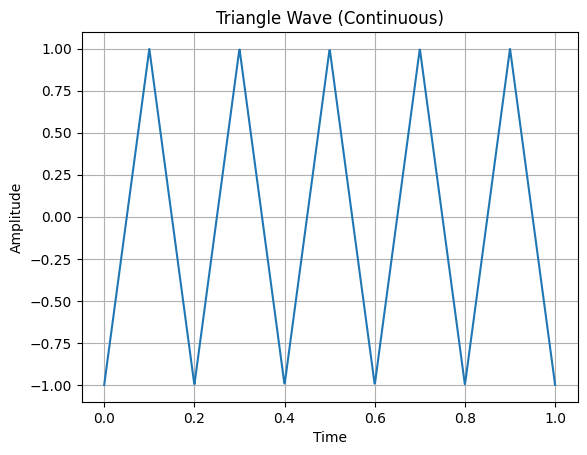

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import sawtooth

t = np.linspace(0, 1, 1000)
freq = 5
x = sawtooth(2 * np.pi * freq * t, width=0.5)  # Triangle Waveform

plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Triangle Wave (Continuous)')
plt.grid(True)
plt.show()


## Define sampling points

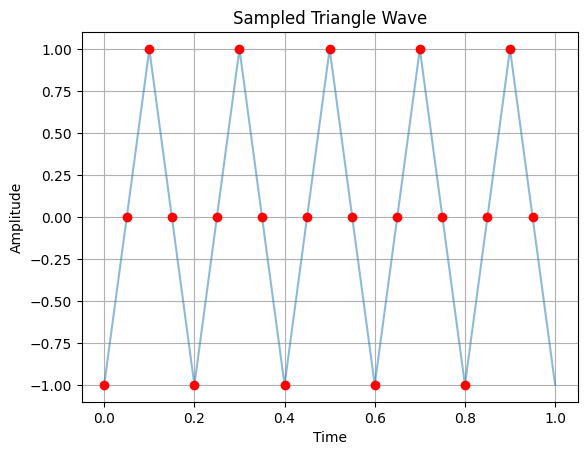

In [18]:
t_sampled = np.arange(0,1, 1/20) #1/20 means fs = 20 Hz
x_sampled = sawtooth(2 * np.pi * freq * t_sampled , width = 0.5)
plt.plot(t,x, label = 'Original Triangle Wave', alpha = 0.5)
plt.scatter(t_sampled,x_sampled, color = 'r' , label = 'Sampled points', zorder = 3)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sampled Triangle Wave')
plt.grid(True)
plt.show()


### A test code for Violating Nyquist frequency

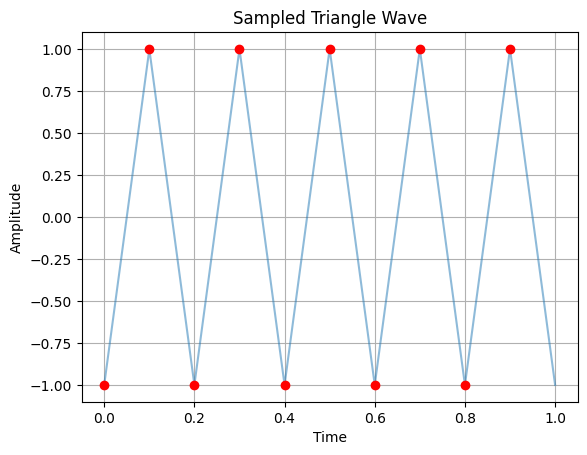

In [21]:
t_sampled = np.arange(0,1, 1/10) #1/6 means fs = 6 Hz that is less than Nyquist frequency
x_sampled = sawtooth(2 * np.pi * freq * t_sampled , width = 0.5)
plt.plot(t,x, label = 'Original Triangle Wave', alpha = 0.5)
plt.scatter(t_sampled,x_sampled, color = 'r' , label = 'Aliased Sample', zorder = 3)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sampled Triangle Wave')
plt.grid(True)
plt.show()


### In frequency Domain

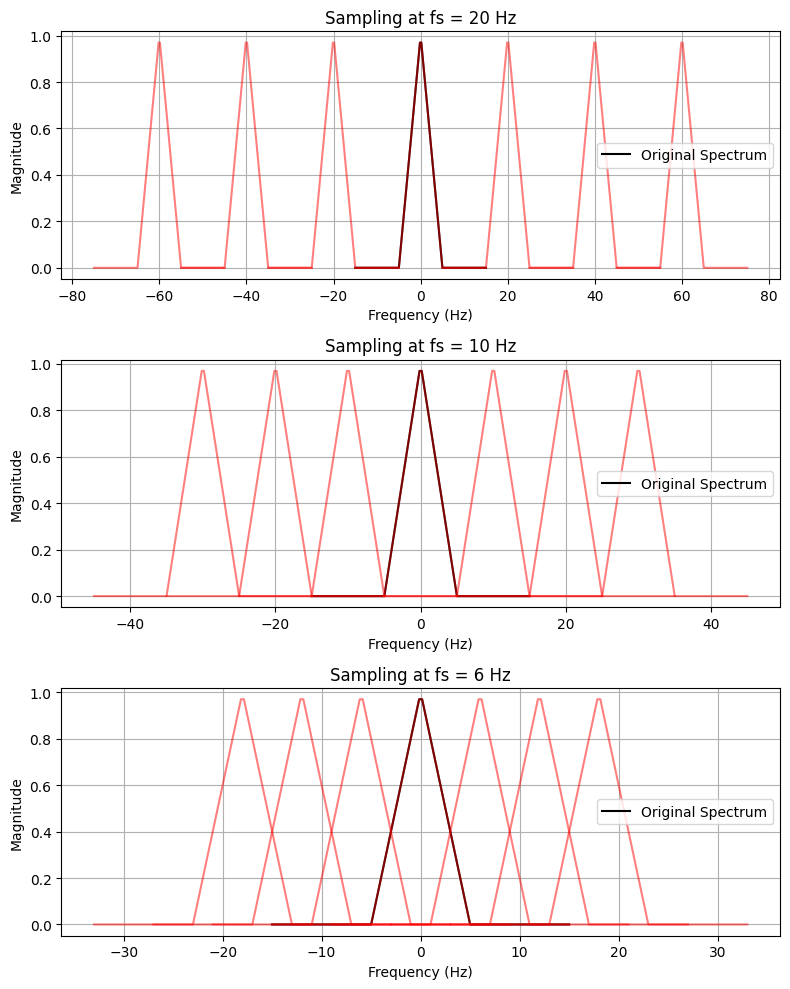

In [27]:
import numpy as np
import matplotlib.pyplot as plt


f_N = 5
fs_values = [20, 10, 6]

fig, axes = plt.subplots(3, 1, figsize=(8, 10))

for i, fs in enumerate(fs_values):
    f_range = np.linspace(-3*f_N, 3*f_N, 100)
    spectrum = np.maximum(0, 1 - np.abs(f_range) / f_N)

    axes[i].plot(f_range, spectrum, 'k', label="Original Spectrum")

    for k in range(-3, 4):
        shifted_f_range = f_range + k * fs
        axes[i].plot(shifted_f_range, spectrum, 'r', alpha=0.5)

    axes[i].set_title(f"Sampling at fs = {fs} Hz")
    axes[i].set_xlabel("Frequency (Hz)")
    axes[i].set_ylabel("Magnitude")
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.show()
